In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)

%matplotlib inline

In [2]:


data_types_dict = {
    'row_id': 'int64',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
}


df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")

In [3]:
import sys
sys.path.append("../")
# df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
# df = df[df["answered_correctly"] != -1]

In [4]:
df["answered_correctly"] = df["answered_correctly"].replace(-1, np.nan)

In [5]:
group = df.groupby("user_id").size()

findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.


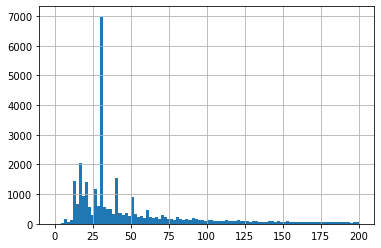

In [6]:
group.hist(range=(0, 200), bins=100)

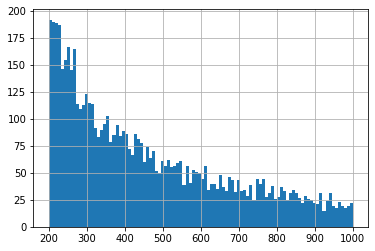

In [7]:
group.hist(range=(200, 1000), bins=100)

In [8]:
df["user_count"] = df.groupby("user_id").cumcount()

In [9]:
df[df["user_count"] <= 100]["answered_correctly"].mean()

0.5775253634136923

In [30]:
df["user_count_bin"] = pd.cut(df["user_count"], [-1, 29, 10**2, 10**2.5, 10**3, 10**4, 10**5], labels=False)

In [31]:
df.groupby(["user_count_bin"])["answered_correctly"].describe()

,count,mean,std,min,25%,50%,75%,max
user_count_bin,,,,,,,,
0,1068070.0,0.507602,0.499942,0.0,0.0,1.0,1.0,1.0
1,1122684.0,0.644048,0.478801,0.0,0.0,1.0,1.0,1.0
2,1826478.0,0.658168,0.474324,0.0,0.0,1.0,1.0,1.0
3,2570311.0,0.671710,0.469591,0.0,0.0,1.0,1.0,1.0
4,3193080.0,0.691345,0.461938,0.0,0.0,1.0,1.0,1.0
5,56919.0,0.744936,0.435901,0.0,0.0,1.0,1.0,1.0


In [54]:
df.groupby(["user_count_bin", "prior_question_had_explanation"])["answered_correctly"].describe()

count      mean       std  \
user_count_bin prior_question_had_explanation                                  
0              False                            658016.0  0.441471  0.496563   
               True                             370870.0  0.606460  0.488535   
1              False                             72783.0  0.587994  0.492199   
               True                            1049901.0  0.647933  0.477615   
2              False                             63282.0  0.605654  0.488714   
               True                            1763196.0  0.660053  0.473691   
3              False                             51088.0  0.686756  0.463817   
               True                            2519223.0  0.671405  0.469702   
4              False                             64759.0  0.720935  0.448543   
               True                            3128321.0  0.690733  0.462192   
5              False                               544.0  0.744485  0.436552   
               True                              56375.0  0.744940  0.435899   

                                               min  25%  50%  75%  max  
user_count_bin prior_question_had_explanation                           
0              False                           0.0  0.0  0.0  1.0  1.0  
               True                            0.0  0.0  1.0  1.0  1.0  
1              False                           0.0  0.0  1.0  1.0  1.0  
               True                            0.0  0.0  1.0  1.0  1.0  
2              False                           0.0  0.0  1.0  1.0  1.0  
               True                            0.0  0.0  1.0  1.0  1.0  
3              False                           0.0  0.0  1.0  1.0  1.0  
               True                            0.0  0.0  1.0  1.0  1.0  
4              False                           0.0  0.0  1.0  1.0  1.0  
               True                            0.0  0.0  1.0  1.0  1.0  
5              False                           0.0  0.0  1.0  1.0  1.0  
               True                            0.0  0.0  1.0  1.0  1.0

In [32]:
group = df.groupby(["user_id", "user_count_bin"])["answered_correctly"].agg(["mean", "size"])

In [33]:
group.head(30)

mean  size
user_id user_count_bin                
24600   0               0.200000    30
        1               0.550000    20
108310  0               0.700000    30
        1               1.000000     7
138650  0               0.666667    30
        1               0.746479    71
        2               0.680952   216
        3               0.724292   684
        4               0.701923   104
301590  0               0.344828    30
        1               0.507246    71
        2               0.254902    53
341420  0               0.586207    30
        1               0.558140    43
385630  0               0.482759    30
        1               0.314286    71
        2               0.464000   128
408250  0               0.500000    30
        1               0.642857    71
        2               0.700000   216
        3               0.802139   190
444790  0               0.187500    16
475020  0               0.517241    30
        1               0.571429    71
        2               0.671429   216
        3               0.695652   684
        4               0.697368    81
496840  0               0.633333    30
        1               0.597015    71
        2               0.742857   216

# 何人か見てみる


In [34]:
df["target_enc_content_id"] = df.groupby("content_id")["answered_correctly"].transform("mean")

In [35]:
df.groupby(["user_count_bin"])["target_enc_content_id"].describe()

,count,mean,std,min,25%,50%,75%,max
user_count_bin,,,,,,,,
0,1070192.0,0.557484,0.199002,0.083958,0.417044,0.567784,0.710938,1.0
1,1131213.0,0.665730,0.168531,0.071429,0.555556,0.686488,0.790952,1.0
2,1844691.0,0.659930,0.170062,0.000000,0.549742,0.679300,0.786247,1.0
3,2596642.0,0.664610,0.167607,0.000000,0.556077,0.682566,0.789179,1.0
4,3214566.0,0.674136,0.166623,0.000000,0.567976,0.692776,0.798898,1.0
5,57077.0,0.677884,0.175394,0.083958,0.565966,0.702954,0.813187,1.0


In [36]:
for uid in [2146526200, 2146590530, 2146672950, 2146993860]:
    df[df["user_id"] == uid].to_csv(f"016_user_id/{uid}.csv", index=False)

In [38]:
df["sum_ans"] = df.groupby("user_id")["answered_correctly"].cumsum()

In [45]:
for i in [1, 2, 3, 4, 5, 6, 7]:
    df[f"is_part{i}"] = (df["part"] == i).astype("int8")
    df[f"part{i}_cumsum"] = df.groupby("user_id")[f"is_part{i}"].cumsum()

In [46]:
w_df = df[df["user_count_bin"] == 0].groupby("user_id").last()

In [41]:
import seaborn as sns

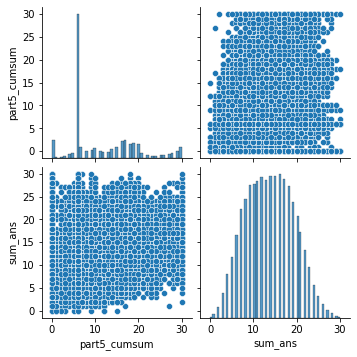

In [43]:
sns.pairplot(w_df[["part5_cumsum", "sum_ans"]])

In [44]:
w_df["part5_cumsum"].value_counts()

6     15064
17     1920
0      1857
16     1800
19     1598
20     1493
18     1442
15     1176
7      1125
30     1124
10     1025
14      936
9       814
11      776
29      733
8       714
13      637
12      610
21      590
28      584
5       571
4       442
27      394
26      345
25      285
22      284
3       255
24      252
23      241
2       126
1        78
Name: part5_cumsum, dtype: int64

In [49]:
cols = [f"part{i}_cumsum" for i in [1, 2, 3, 4, 5, 6, 7]]
w_df[w_df["part5_cumsum"] == 6][cols]

,part1_cumsum,part2_cumsum,part3_cumsum,part4_cumsum,part5_cumsum,part6_cumsum,part7_cumsum
user_id,,,,,,,
24600,3,1,3,9,6,4,4
138650,3,1,3,9,6,4,4
408250,3,1,3,9,6,4,4
745460,3,1,3,9,6,4,4
841970,3,1,3,9,6,4,4
...,...,...,...,...,...,...,...
2146821380,3,1,3,9,6,4,4
2146845160,3,1,3,9,6,4,4
2146960830,3,1,3,9,6,4,4


In [51]:
w_df.groupby("part5_cumsum")["sum_ans"].describe()

,count,mean,std,min,25%,50%,75%,max
part5_cumsum,,,,,,,,
0,1857.0,16.838988,7.519546,0.0,11.0,19.0,23.00,30.0
1,78.0,9.358974,7.509257,0.0,4.0,6.0,14.75,28.0
2,126.0,11.857143,6.668990,0.0,7.0,10.0,16.75,27.0
3,255.0,11.647059,6.060143,0.0,7.0,11.0,16.00,27.0
4,442.0,12.800905,6.142761,1.0,8.0,12.0,18.00,27.0
5,571.0,12.719790,6.424073,0.0,8.0,12.0,18.00,28.0
6,15064.0,12.341742,4.966292,0.0,9.0,12.0,15.00,30.0
7,1125.0,12.886222,6.305073,1.0,8.0,12.0,18.00,30.0
8,714.0,13.473389,5.900531,1.0,9.0,13.5,18.00,26.0
